## 250810 Convergence

In [7]:
import pandas as pd
from sequenzo import *

In [8]:
# ------------------------
# Step 0: ÂÆö‰πâÊèêÂèñÂ∑•ÂÖ∑ÂáΩÊï∞
# ------------------------

def extract_state_space(sequences):
    return sorted(set(s for seq in sequences for s in seq))

# ------------------------
# Step 1: ËØªÂèñÂíåÂáÜÂ§áÊï∞ÊçÆ
# ------------------------

df = pd.read_csv("/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/test_data/real_data_my_paper/detailed_sequence_10_work_years_df.csv")

time_cols = [f"C{i}" for i in range(1, 11)]  # C1~C10

# ÂÅáËÆæ 'country' ÊòØ‰∏ÄÂàóÔºåÂÄº‰∏∫ 'India' Êàñ 'US'
india_df = df[df["country"] == "india"].copy()
us_df = df[df["country"] == "us"].copy()

T = len(time_cols)  # ‰∏ÄËà¨ÊòØÂõ∫ÂÆö 10

# ÊèêÂèñ sequence Âàó
india_sequences = extract_sequences(india_df, time_cols)
us_sequences = extract_sequences(us_df, time_cols)

india_states = extract_state_space(india_sequences)
us_states = extract_state_space(us_sequences)

# ------------------------
# Step 2: ÊûÑÂª∫ÂêéÁºÄÊ†ë
# ------------------------

india_tree = build_suffix_tree(india_sequences)
us_tree = build_suffix_tree(us_sequences)

# ‰∏∫ÊØè‰∏™ÂõΩÂÆ∂ÂàÜÂà´Âª∫Ê®°
india_model = IndividualConvergence(india_sequences)
us_model = IndividualConvergence(us_sequences)

In [9]:
india_suffix_counts = compute_suffix_count(india_tree, T)
india_merging_factors = compute_merging_factor(india_tree, T)
india_js_scores = compute_js_convergence(india_sequences, state_set=india_states)

us_suffix_counts = compute_suffix_count(us_tree, T)
us_merging_factors = compute_merging_factor(us_tree, T)
us_js_scores = compute_js_convergence(us_sequences, state_set=us_states)

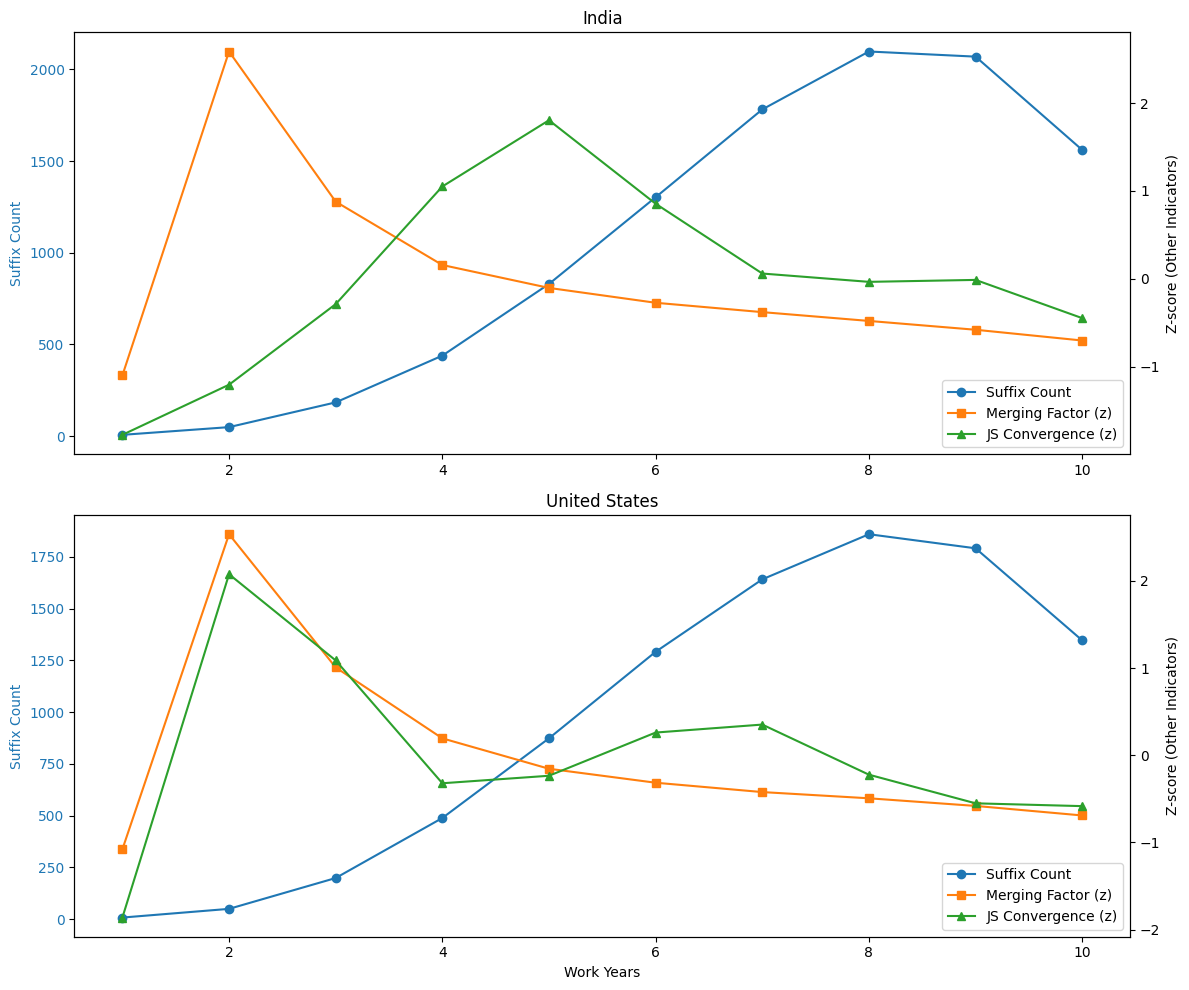

‚úÖ Â∑≤ÁîüÊàêÂ∏¶ÊúâËá™ÂÆö‰πâÊ†áÈ¢òÁöÑÂØπÊØîÂõæ


<Figure size 640x480 with 0 Axes>

In [10]:
# ÊºîÁ§∫Ëá™ÂÆö‰πâÂ≠êÂõæÊ†áÈ¢òÂäüËÉΩ
# ‰ΩøÁî®ÂÆåÂÖ®Ëá™ÂÆö‰πâÁöÑÊ†áÈ¢ò

# ÂáÜÂ§á‰∏§ÁªÑÊï∞ÊçÆ
custom_groups_data = {
    "IND": {
        "suffix_counts": india_suffix_counts,
        "merging_factors": india_merging_factors,
        "js_convergence": india_js_scores
    },
    "USA": {
        "suffix_counts": us_suffix_counts,
        "merging_factors": us_merging_factors,
        "js_convergence": us_js_scores
    }
}

# ‰ΩøÁî®Ëá™ÂÆö‰πâÂ≠êÂõæÊ†áÈ¢ò
plot_system_indicators_multiple_comparison(
    groups_data=custom_groups_data,
    group_names=["India", "United States"],  # Ëøô‰∏™‰ªÖÁî®‰∫éÈªòËÆ§Ê†áÈ¢òÊ†ºÂºèÔºåÂΩìÊúâsubplot_titlesÊó∂‰ºöË¢´Ë¶ÜÁõñ
    subplot_titles=[
        "India", 
        "United States"
    ],  # ÂÆåÂÖ®Ëá™ÂÆö‰πâÁöÑÂ≠êÂõæÊ†áÈ¢ò
    x_values=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # ÂèØ‰ª•ÊòØÂπ¥‰ªΩ„ÄÅÊó∂ÊúüÁ≠â
    x_label="Work Years",  # Ëá™ÂÆö‰πâxËΩ¥Ê†áÁ≠æ
    legend_loc='lower right',  # Âõæ‰æã‰ΩçÁΩÆ
    save_as="suffix_system_indicators_comparison"
)

print("‚úÖ Â∑≤ÁîüÊàêÂ∏¶ÊúâËá™ÂÆö‰πâÊ†áÈ¢òÁöÑÂØπÊØîÂõæ")


In [11]:
# ------------------------
# Step 4: ËÆ°ÁÆó‰∏™‰ΩìÂ±ÇÊåáÊ†á
# ------------------------

# ËµãÂÄºÂõû dataframe
india_df["converged"] = india_model.compute_converged()
india_df["first_convergence_year"] = india_model.compute_first_convergence_year()
india_df["suffix_rarity_score"] = india_model.compute_suffix_rarity_score()
india_df["path_uniqueness"] = india_model.compute_path_uniqueness()

us_df["converged"] = us_model.compute_converged()
us_df["first_convergence_year"] = us_model.compute_first_convergence_year()
us_df["suffix_rarity_score"] = us_model.compute_suffix_rarity_score()
us_df["path_uniqueness"] = us_model.compute_path_uniqueness()

# ÂêàÂπ∂ÂõûÊÄªÊï∞ÊçÆ
df = pd.concat([india_df, us_df], ignore_index=True)

ËÆ°ÁÆóÊØèÂπ¥ suffix rarity

Â¶ÇÊûúÊüê‰∫õÂπ¥Âá†‰πéÊâÄÊúâ‰∫∫Áõ∏ÂêåÔºàÊñπÂ∑ÆÊé•Ëøë 0ÔºâÔºåz ÂàÜÊï∞‰ºöÊòØ NaNÔºõËøôÁßçÊÉÖÂÜµ‰∏ãÂéüÂßãÂ∞∫Â∫¶ÁöÑ rarity Êõ¥Á®≥ÂÅ•„ÄÇ


In [13]:
# ËøîÂõû DataFrameÔºåÂàóÂêç t1..t10Ôºõzscore=True ÂàôÊåâÂπ¥ÂÅöÂàóÂÜÖÊ†áÂáÜÂåñ
df_rarity_india = india_model.compute_suffix_rarity_per_year(as_dataframe=True, column_prefix="t", zscore=False)
df_rarity_us = us_model.compute_suffix_rarity_per_year(as_dataframe=True, column_prefix="t", zscore=False)
# Ëã•ÈúÄË¶Å z ÂàÜÊï∞ÁâàÊú¨Ôºö
# df_rarity_z = div.compute_prefix_rarity_per_year(as_dataframe=True, column_prefix="t", zscore=True)

df_rarity_india

t1        t2        t3        t4        t5        t6        t7  \
0      0.915332  0.898778  0.878663  0.845755  0.814941  0.781862  0.751244   
1      0.915332  0.898778  0.878663  0.845755  0.814941  0.781862  0.751244   
2      0.915332  0.898778  0.878663  0.845755  0.814941  0.781862  0.751244   
3      0.915332  0.898778  0.878663  0.845755  0.814941  0.781862  0.751244   
4      0.915332  0.898778  0.878663  0.845755  0.814941  0.781862  0.751244   
...         ...       ...       ...       ...       ...       ...       ...   
15108  0.915332  0.898778  0.878663  0.845755  0.814941  0.781862  0.751244   
15109  9.623309  9.623309  9.623309  4.922830  4.887112  4.861137  2.057000   
15110  0.915332  0.898778  0.878663  0.845755  0.814941  0.781862  0.751244   
15111  2.559407  2.527417  2.460138  2.363491  2.243678  2.148538  2.057000   
15112  5.580259  5.545773  5.512437  5.464427  5.448923  3.123524  2.953812   

             t8        t9       t10  
0      0.726312  0.696395  0.662843  
1      0.726312  0.696395  0.662843  
2      0.726312  0.696395  0.662843  
3      0.726312  0.696395  0.662843  
4      0.726312  0.696395  0.662843  
...         ...       ...       ...  
15108  0.726312  0.696395  0.662843  
15109  1.986558  1.887440  1.812552  
15110  0.726312  0.696395  0.662843  
15111  1.986558  1.887440  1.812552  
15112  2.796765  2.639521  2.502058  

[15113 rows x 10 columns]

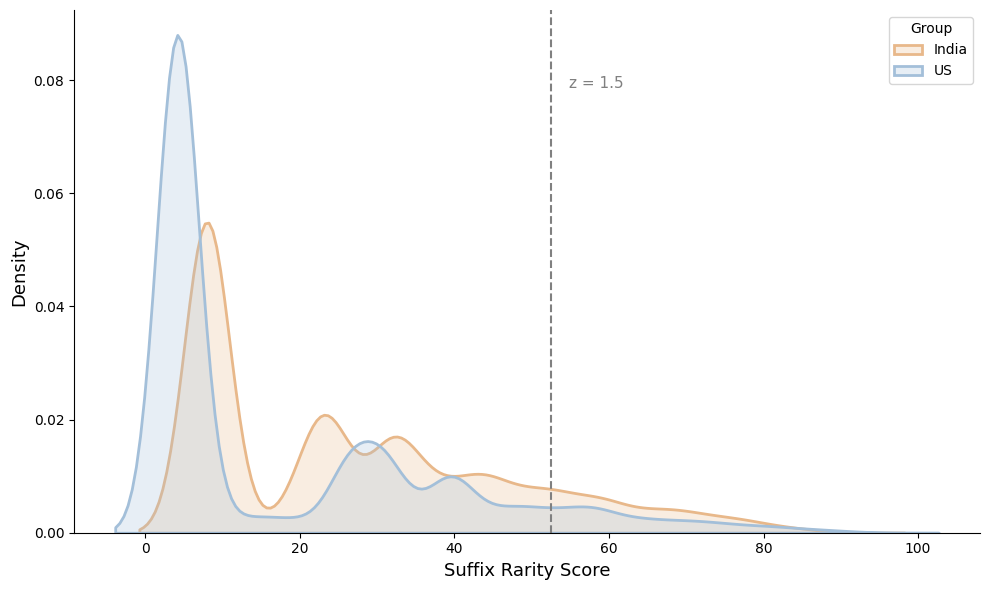

üìä ÁªüËÆ°‰ø°ÊÅØ: {'mean': 21.692416720586753, 'std': 20.562873606961777, 'threshold_value': 52.53672713102942, 'z_threshold': 1.5}


In [14]:
# üéâ ‰ΩøÁî®Êñ∞ÁöÑÈÄöÁî®ÂèØËßÜÂåñÂáΩÊï∞ÔºÅ
# ÊºîÁ§∫ plot_prefix_rarity_distribution ÁöÑÂêÑÁßçÁî®Ê≥ï

# Á§∫‰æã1ÔºöÂ§öÁªÑÂØπÊØîÔºåÂ∏¶ÈòàÂÄºÁ∫øÔºà‰Ω†Áé∞Âú®Ê≠£Âú®‰ΩøÁî®ÁöÑÊïàÊûúÔºâ
data_dict = {
    "India": india_df["suffix_rarity_score"].tolist(),
    "US": us_df["suffix_rarity_score"].tolist()
}

stats = plot_suffix_rarity_distribution(
    data=data_dict,
    colors={"India": "#E8B88A", "US": "#A3BFD9"},
    show_threshold=True,
    z_threshold=1.5,
    save_as="suffix_rarity_distribution_with_threshold"
)

print("üìä ÁªüËÆ°‰ø°ÊÅØ:", stats)
